<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [3]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [4]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [5]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [6]:
boston_df=pd.read_csv(boston_url)

In [7]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


#### Task 2: Generate Descriptive Statistics and Visualizations

##### Exercise 1: For the "Median value of owner-occupied homes" provide a boxplot

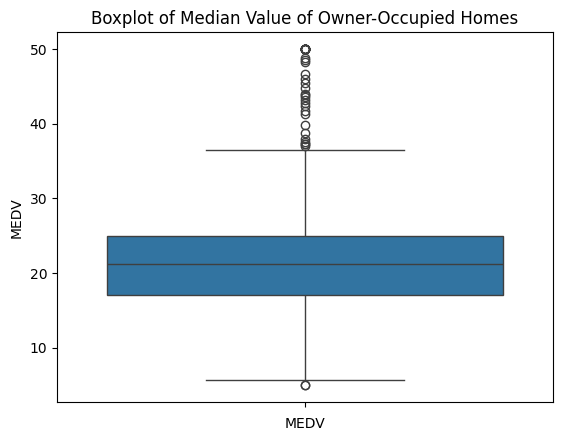

In [8]:
# 1. We will use the MEDV column2.
# 2. For the boxplot we use seaborn package
# 3. For title and labels, we use matplotlib

ax = sns.boxplot(y="MEDV", data=boston_df)
plt.title('Boxplot of Median Value of Owner-Occupied Homes')
plt.xlabel('MEDV')
plt.show()

**Findings:**
1. The central value for the median home price is around 22,000 USD (Median value of owner-occupied homes in 1000's USD).
2. There are several outliers, which can be a sign of a inconsistency in home prices.

##### Exercise 2: Provide a  bar plot for the Charles river variable

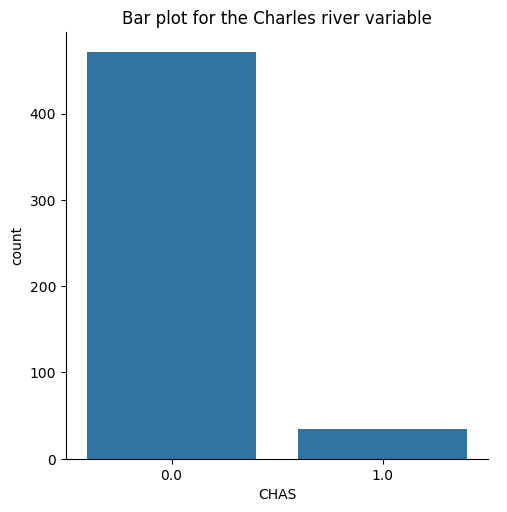

In [9]:
sns.catplot(x='CHAS', kind='count', data=boston_df)
plt.title('Bar plot for the Charles river variable')
plt.show()

**Findings:**
1. The plot shows that the majority of homes are not located next to the Charles River.

##### Exercise 3: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

In [10]:
# First we split data in 3 groups:

boston_df.loc[(boston_df['AGE'] <= 35), 'age_group'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35)&(boston_df['AGE'] < 70), 'age_group'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'age_group'] = '70 years and older'

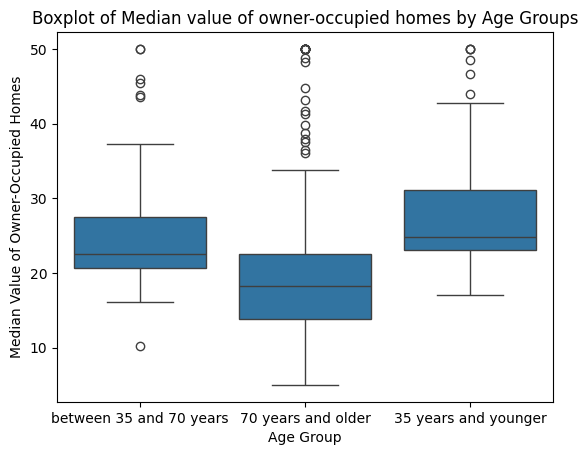

In [11]:
# Now we plot age_group vs MEDV

sns.boxplot(x='age_group', y='MEDV', data=boston_df)
plt.title('Boxplot of Median value of owner-occupied homes by Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Median Value of Owner-Occupied Homes')
plt.xticks(fontsize=10) # adjust the size of groups
plt.show()

##### Exercise 4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

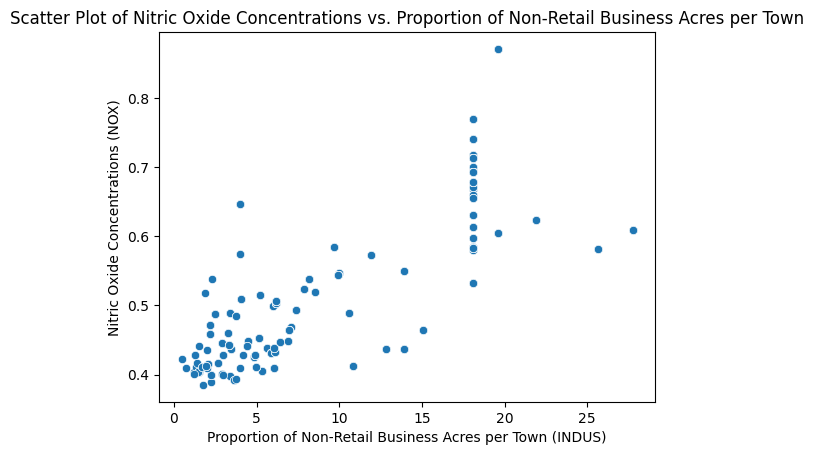

In [12]:
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
plt.title('Scatter Plot of Nitric Oxide Concentrations vs. Proportion of Non-Retail Business Acres per Town')
plt.xlabel('Proportion of Non-Retail Business Acres per Town (INDUS)')
plt.ylabel('Nitric Oxide Concentrations (NOX)')

plt.show()

**Findings:**
1. There is a faint positive correlation, meaning that as the proportion of non-retail business acres per town increases, the Nitric Oxide concentrations also tend to increase.

##### Exercise 5: Create a histogram for the pupil to teacher ratio variable

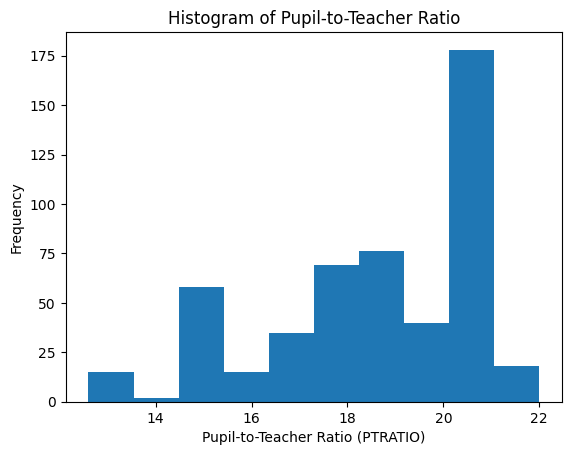

In [14]:
plt.hist(boston_df["PTRATIO"])
plt.title('Histogram of Pupil-to-Teacher Ratio')
plt.xlabel('Pupil-to-Teacher Ratio (PTRATIO)')
plt.ylabel('Frequency')
plt.show()

#### Task 3: Use the appropriate tests to answer the questions provided.

##### Exercise 1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Hypothesis:
- H0: There is no significant difference in mean values of houses bounded by the Charles River
- H1: There is a significant difference in median value of houses bounded by the Charles River.

In [15]:
# 1. Run a Levene test:
# Split the data based on CHAS (0 = not bounded by Charles river, 1 = bounded by Charles river)

medv_not_chas = boston_df[boston_df['CHAS'] == 0]['MEDV']
medv_chas = boston_df[boston_df['CHAS'] == 1]['MEDV']

In [16]:
levene_test = scipy.stats.levene(medv_not_chas, medv_chas, center='mean')
levene_test

# We cannot assume equality of variations

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [17]:
# 1. Run the T-test for independent samples:

scipy.stats.ttest_ind(medv_not_chas, medv_chas)

TtestResult(statistic=-3.996437466090509, pvalue=7.390623170519905e-05, df=504.0)

**Findings:**
1. We reject the null hypothesis (H0) because the p-value is less than 0.05.
2. This means that there is strong evidence to support the alternative hypothesis (H1), there is a significant difference in median values of houses bounded by the Charles River compared to those that are not.

##### Exercise 2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Hypothesis:
- H0: There is no significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940.
- H1: There is a significant difference in median values of houses across different proportions of owner-occupied units built prior to 1940.

In [18]:
one = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
two = boston_df[boston_df['age_group'] == 'between 35 and 70 years']['MEDV']
three = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']


In [19]:
f_statistic, p_value = scipy.stats.f_oneway(one, two, three)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


**Findings:**
1. We reject the null hypothesis (H0) because the p-value is significantly smaller than the chosen significance level.
2. There is  evidence to conclude that there is a significant difference in median house values for different proportions of owner-occupied units built prior to 1940.

##### Exercise 3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

Hypothesis:
- H0: There is no linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.
- H1: There is a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

In [20]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

**Findings:**
1. We reject the null hypothesis (H0) because the p-value is significantly smaller than the chosen significance level.
2. There is  evidence to conclude that there is a linear relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

##### Exercise 4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

In [21]:
# Define the independent variable (X) and dependent variable (y)
X = boston_df['DIS']  # Weighted distance to employment centers
y = boston_df['MEDV']  # Median value of owner-occupied homes

# Add a constant to the independent variable (X) for the intercept term
X = sm.add_constant(X)

# Fit the linear regression model
model = sm.OLS(y, X).fit()

# Print the regression results
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 15 Jul 2024   Prob (F-statistic):           1.21e-08
Time:                        15:49:24   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

**Findings:**
1. The coefficient of determination, R-squared, is 0.062. This means that approximately 6.2% of the variance in the median value of homes can be explained by the weighted distance to employment centers.
2. There is strong evidence that at least one of the predictors is related to the median value of homes.
3. The regression model suggests that there is a statistically significant relationship between the weighted distance to employment centers and the median value of owner-occupied homes.

Answers by: MD